# TCS_ANN_MLP_Model

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##  step1: Importing_Data

In [2]:
# data taking
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/IIIT_Guwahati/ANN_MLP/Yr_22/PrepStep_TCS.2002 sept_NS.csv')

### s(i) delete_Last_Row

In [ ]:
# Import necessary libraries
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/IIIT_Guwahati/ANN_MLP/TCS.NS_Data set for all trials.csv'  # Update this path if necessary
data = pd.read_csv(file_path, parse_dates=['Date'], dayfirst=True)

# Display the original dataset
print("Original dataset:")
print(data)

# Remove the last 10 rows
data = data[:-10]

# Display the updated dataset
print("\nUpdated dataset (last 10 rows removed):")
print(data)

# Save the updated dataset to a new CSV file if needed
# data.to_csv('/mnt/data/TCS_News_Dataset_Updated.csv', index=False)

# restore the variable from data to df
df = data

Original dataset:
          Date         Open         High          Low        Close  \
0    6/12/2023  3215.000000  3254.399902  3211.000000  3246.899902   
1    6/13/2023  3260.000000  3265.000000  3239.000000  3243.699951   
2    6/14/2023  3243.699951  3255.850098  3225.850098  3251.050049   
3    6/15/2023  3245.300049  3247.449951  3210.000000  3216.300049   
4    6/16/2023  3197.000000  3199.399902  3156.000000  3174.899902   
..         ...          ...          ...          ...          ...   
239   6/4/2024  3700.000000  3745.000000  3591.500000  3715.000000   
240   6/5/2024  3716.000000  3783.800049  3700.000000  3746.449951   
241   6/6/2024  3781.000000  3839.899902  3741.500000  3830.399902   
242   6/7/2024  3837.300049  3915.000000  3837.300049  3893.949951   
243  6/10/2024  3895.000000  3905.899902  3841.899902  3858.699951   

       Adj Close   Volume  
0    3168.457764  2324605  
1    3165.335205  1371928  
2    3172.507813  1658544  
3    3161.939697  2273810  
4

In [3]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,02-09-2002,44.750000,45.974998,44.049999,44.500000,31.293869,2389568,NaN,NaN,3746.449951
1,03-09-2002,44.750000,44.937500,42.000000,42.412498,29.825882,986784,NaN,NaN,3830.399902
2,04-09-2002,41.875000,43.750000,41.387501,43.337502,30.476370,1449856,NaN,NaN,3893.949951
3,05-09-2002,44.662498,44.862499,42.500000,43.075001,30.291769,1061360,NaN,NaN,3858.699951
4,06-09-2002,43.250000,43.250000,41.012501,41.474998,29.166615,907472,NaN,NaN,3852.100098
...,...,...,...,...,...,...,...,...,...,...
5404,12-06-2024,3874.399902,3893.500000,3827.449951,3831.649902,3831.649902,2177001,NaN,NaN,NaN
5405,13-06-2024,3856.800049,3890.000000,3852.000000,3878.149902,3878.149902,1932323,NaN,NaN,NaN
5406,14-06-2024,3889.000000,3889.000000,3828.000000,3832.050049,3832.050049,1860730,NaN,NaN,NaN
5407,18-06-2024,3826.050049,3842.000000,3795.050049,3815.100098,3815.100098,1774045,NaN,NaN,NaN


## step0: Prob_statement_Define

Q. Problem statement: Forcast Close price (Dependent variable) considering all factor (Open, low, close, Adj close, volume) as independent variables

Sol: we try to

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,02-09-2002,44.750000,45.974998,44.049999,44.500000,31.293869,2389568,NaN,NaN,3746.449951
1,03-09-2002,44.750000,44.937500,42.000000,42.412498,29.825882,986784,NaN,NaN,3830.399902
2,04-09-2002,41.875000,43.750000,41.387501,43.337502,30.476370,1449856,NaN,NaN,3893.949951
3,05-09-2002,44.662498,44.862499,42.500000,43.075001,30.291769,1061360,NaN,NaN,3858.699951
4,06-09-2002,43.250000,43.250000,41.012501,41.474998,29.166615,907472,NaN,NaN,3852.100098


In [18]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,02-09-2002,44.750000,45.974998,44.049999,44.500000,31.293869,2389568
1,03-09-2002,44.750000,44.937500,42.000000,42.412498,29.825882,986784
2,04-09-2002,41.875000,43.750000,41.387501,43.337502,30.476370,1449856
3,05-09-2002,44.662498,44.862499,42.500000,43.075001,30.291769,1061360
4,06-09-2002,43.250000,43.250000,41.012501,41.474998,29.166615,907472
...,...,...,...,...,...,...,...
5404,12-06-2024,3874.399902,3893.500000,3827.449951,3831.649902,3831.649902,2177001
5405,13-06-2024,3856.800049,3890.000000,3852.000000,3878.149902,3878.149902,1932323
5406,14-06-2024,3889.000000,3889.000000,3828.000000,3832.050049,3832.050049,1860730
5407,18-06-2024,3826.050049,3842.000000,3795.050049,3815.100098,3815.100098,1774045


### s(i) show_3unnamed

In [15]:
import pandas as pd

# Create a new DataFrame with only the unnamed columns
UnNamed_Col = df[['Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9']]

# Display the new DataFrame
print(UnNamed_Col)


KeyError: "None of [Index(['Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9'], dtype='object')] are in the [columns]"

In [16]:
import pandas as pd

# Check the actual column names in the DataFrame
print(df.columns)

# Create a new DataFrame with only the unnamed columns using the correct column names
# Replace 'Actual Column Name 7', 'Actual Column Name 8', 'Actual Column Name 9' with the actual names
UnNamed_Col = df[['Actual Column Name 7', 'Actual Column Name 8', 'Actual Column Name 9']]

# Display the new DataFrame
print(UnNamed_Col)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


KeyError: "None of [Index(['Actual Column Name 7', 'Actual Column Name 8', 'Actual Column Name 9'], dtype='object')] are in the [columns]"

In [17]:
import pandas as pd

# Check the actual column names in the DataFrame
print(df.columns)

# Create a new DataFrame with only the unnamed columns using the correct column names
# Replace 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9' with the actual names from the output above
UnNamed_Col = df[['Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9']]  # Use actual column names here

# Display the new DataFrame
print(UnNamed_Col)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


KeyError: "None of [Index(['Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9'], dtype='object')] are in the [columns]"

### s(ii) delete_unnamed_col

In [8]:
# Check the column names
print(df.columns)

# Drop the unnamed columns
df = df.drop(['Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9'], axis=1)

# Check the updated column names
print(df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9'],
      dtype='object')
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [20]:
# show after deleted column

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,02-09-2002,44.750000,45.974998,44.049999,44.500000,31.293869,2389568
1,03-09-2002,44.750000,44.937500,42.000000,42.412498,29.825882,986784
2,04-09-2002,41.875000,43.750000,41.387501,43.337502,30.476370,1449856
3,05-09-2002,44.662498,44.862499,42.500000,43.075001,30.291769,1061360
4,06-09-2002,43.250000,43.250000,41.012501,41.474998,29.166615,907472
...,...,...,...,...,...,...,...
5404,12-06-2024,3874.399902,3893.500000,3827.449951,3831.649902,3831.649902,2177001
5405,13-06-2024,3856.800049,3890.000000,3852.000000,3878.149902,3878.149902,1932323
5406,14-06-2024,3889.000000,3889.000000,3828.000000,3832.050049,3832.050049,1860730
5407,18-06-2024,3826.050049,3842.000000,3795.050049,3815.100098,3815.100098,1774045


In [ ]:
# show statics

# df.describe()

## step2: Analysis_Data

In [19]:
# analysis parts

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5409 entries, 0 to 5408
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5409 non-null   object 
 1   Open       5409 non-null   float64
 2   High       5409 non-null   float64
 3   Low        5409 non-null   float64
 4   Close      5409 non-null   float64
 5   Adj Close  5409 non-null   float64
 6   Volume     5409 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 295.9+ KB


In [21]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Drop any rows where 'Date' conversion failed
df.dropna(subset=['Date'], inplace=True)

# Sort the data by date
df.sort_values(by='Date', inplace=True)

# Summary statistics
summary_stats = df.describe()

# Time range
time_range = df['Date'].min(), df['Date'].max()

summary_stats, time_range


(                                Date         Open         High          Low  \
 count                           2130  2130.000000  2130.000000  2130.000000   
 mean   2013-07-06 22:07:05.915493120  1226.718017  1239.021889  1213.663032   
 min              2002-01-10 00:00:00    36.500000    36.762501    36.125000   
 25%              2008-01-04 18:00:00   245.018749   248.862499   240.000000   
 50%              2013-07-07 00:00:00   779.750000   786.224976   772.312500   
 75%              2018-12-27 00:00:00  1982.487488  1998.712463  1961.750000   
 max              2024-12-06 00:00:00  4153.000000  4229.950195  4121.049805   
 std                              NaN  1172.268858  1182.764992  1162.245333   
 
              Close    Adj Close        Volume  
 count  2130.000000  2130.000000  2.130000e+03  
 mean   1226.414562  1103.082075  2.945048e+06  
 min      36.750000    25.843819  0.000000e+00  
 25%     243.903122   176.979172  1.569837e+06  
 50%     781.437500   621.115051 

In [22]:
#duration
time_range

(Timestamp('2002-01-10 00:00:00'), Timestamp('2024-12-06 00:00:00'))

### s(i) Statistical_Analy

In [23]:
# Summary statistics
summary_stats = df.describe()

summary_stats

,Date,Open,High,Low,Close,Adj Close,Volume
count,2130,2130.000000,2130.000000,2130.000000,2130.000000,2130.000000,2.130000e+03
mean,2013-07-06 22:07:05.915493120,1226.718017,1239.021889,1213.663032,1226.414562,1103.082075,2.945048e+06
min,2002-01-10 00:00:00,36.500000,36.762501,36.125000,36.750000,25.843819,0.000000e+00
25%,2008-01-04 18:00:00,245.018749,248.862499,240.000000,243.903122,176.979172,1.569837e+06
50%,2013-07-07 00:00:00,779.750000,786.224976,772.312500,781.437500,621.115051,2.324454e+06
75%,2018-12-27 00:00:00,1982.487488,1998.712463,1961.750000,1979.937469,1771.976776,3.659879e+06
max,2024-12-06 00:00:00,4153.000000,4229.950195,4121.049805,4192.250000,4162.000000,5.252210e+07
std,NaN,1172.268858,1182.764992,1162.245333,1173.332686,1142.220525,2.603972e+06


In [24]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
21,2002-01-10,37.250000,37.750000,36.125000,36.762501,25.852615,240192
44,2002-01-11,37.525002,38.150002,36.762501,36.962502,25.993269,108792
0,2002-02-09,44.750000,45.974998,44.049999,44.500000,31.293869,2389568
22,2002-02-10,36.762501,36.762501,36.762501,36.762501,25.852615,0
65,2002-02-12,44.875000,49.000000,44.474998,47.387501,33.324471,1388680


### s(ii) Graphically_PriceOverTime

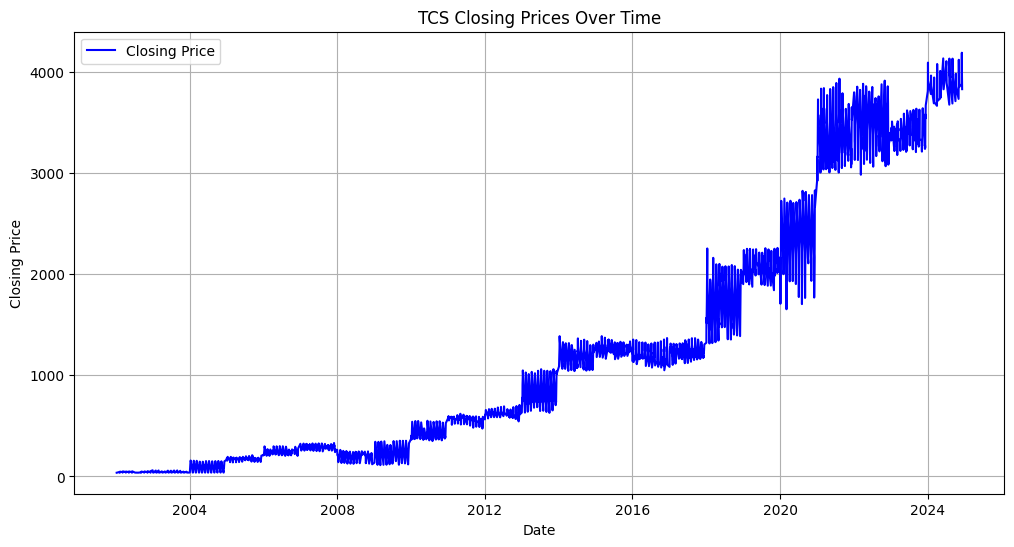

In [25]:
import matplotlib.pyplot as plt

# Plot the closing prices over time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Closing Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('TCS Closing Prices Over Time')
plt.legend()
plt.grid(True)
plt.show()


you can also plot on same graph

## step3: PrePreocessing_Data

In [27]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
21,2002-01-10,37.250000,37.750000,36.125000,36.762501,25.852615,240192
44,2002-01-11,37.525002,38.150002,36.762501,36.962502,25.993269,108792
0,2002-02-09,44.750000,45.974998,44.049999,44.500000,31.293869,2389568
22,2002-02-10,36.762501,36.762501,36.762501,36.762501,25.852615,0
65,2002-02-12,44.875000,49.000000,44.474998,47.387501,33.324471,1388680


In [28]:
# Sort by date
df.sort_values('Date', inplace=True)

In [29]:
# Select the 'Close' column
Close_prices = df['Close'].values

## step4: Splitting_dataPoint

In [30]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
# import metric imp library for MAE, MSE, RMSE, R Sq

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [31]:
# Scale the data
scaler = MinMaxScaler()
Close_prices_scaled = scaler.fit_transform(Close_prices.reshape(-1, 1))


### s(i) prep_dataset_for_MLP

In NumPy, the flatten() function is used to return a copy of the array collapsed into one dimension. It creates a new 1-dimensional array by iterating through all elements of the original array, essentially flattening it.

In [ ]:
# import numpy as np

# # Creating a 2D NumPy array
# arr = np.array([[1, 2, 3],
#                 [4, 5, 6]])

# # Flattening the array
# flatten_arr = arr.flatten()

# print(flatten_arr)
# # Output: [1 2 3 4 5 6]

In [32]:
# Prepare the dataset for MLP
# Use the past 10 days' high prices to predict the next day's high price
X = []
y = []
look_back = 10

for i in range(len(Close_prices_scaled) - look_back):
    X.append(Close_prices_scaled[i:i + look_back])
    y.append(Close_prices_scaled[i + look_back])

X = np.array(X)
y = np.array(y).flatten()

### s(ii) TrainTest_usingMLP_Regressor

In [33]:
# Split the data into training and test sets

train_size = int(len(X) * 0.8)      # 80% taining, 20% testing


X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [34]:
# Reshape X to be 2D for MLPRegressor
X = X.reshape(X.shape[0], -1)  # Reshape to (samples, time_steps * features)

In [ ]:
# Define and train the MLP model

# mlp = MLPRegressor(hidden_layer_sizes=(100,), max_iter=200, random_state=42)

# # no of hidden layer = 100

# mlp.fit(X_train, y_train)

In [37]:
# Prepare the dataset for MLP
# Use the past 10 days' high prices to predict the next day's high price
X = []
y = []
look_back = 10

for i in range(len(Close_prices_scaled) - look_back):
    X.append(Close_prices_scaled[i:i + look_back])
    y.append(Close_prices_scaled[i + look_back])

X = np.array(X)
y = np.array(y).flatten()

# Reshape X to be 2D for MLPRegressor
X = X.reshape(X.shape[0], -1)  # Reshape to (samples, time_steps * features)

# Split the data into training and test sets
train_size = int(len(X) * 0.8)      # 80% taining, 20% testing
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Define and train the MLP REGRESSOR  model
mlp = MLPRegressor(hidden_layer_sizes=(100,), max_iter=200, random_state=42)
mlp.fit(X_train, y_train)

MLPRegressor(random_state=42)

## Step5: Predication

In [38]:
# Make predictions
train_predictions = mlp.predict(X_train)
test_predictions = mlp.predict(X_test)


In [39]:
# Inverse transform the predictions and actual values

train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))

y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

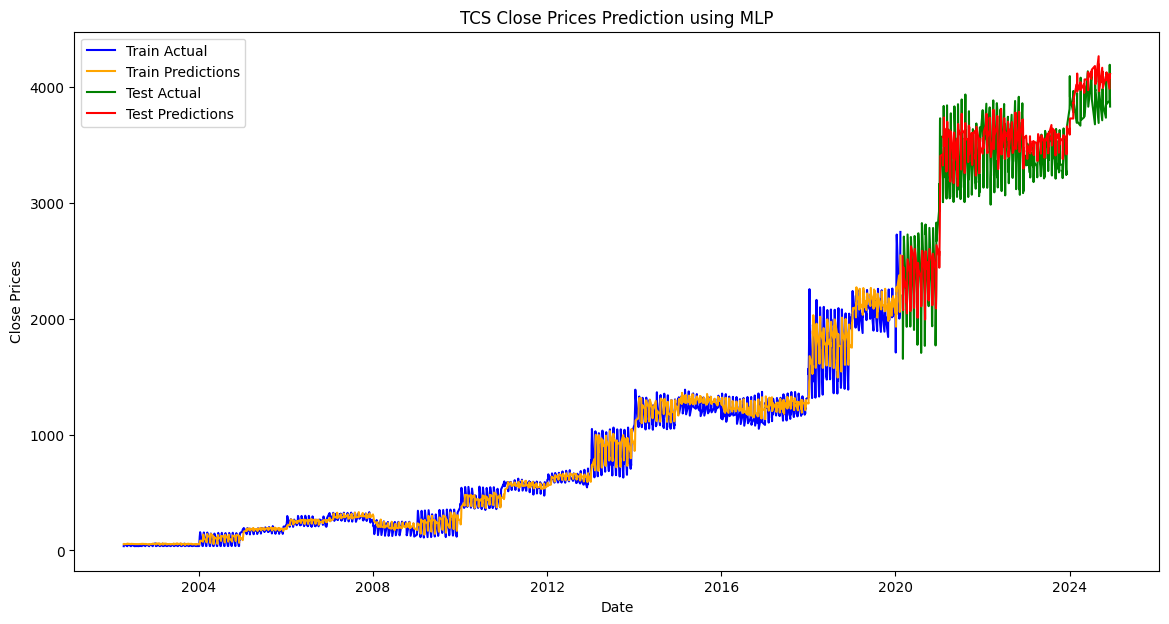

In [40]:
# Plot the actual vs. predicted Close prices


plt.figure(figsize=(14, 7))

plt.plot(df['Date'][look_back:train_size + look_back], y_train_actual, label='Train Actual', color='blue')
plt.plot(df['Date'][look_back:train_size + look_back], train_predictions, label='Train Predictions', color='orange')
plt.plot(df['Date'][train_size + look_back:], y_test_actual, label='Test Actual', color='green')
plt.plot(df['Date'][train_size + look_back:], test_predictions, label='Test Predictions', color='red')


plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.title('TCS Close Prices Prediction using MLP')
plt.legend()
plt.show()



### s(i) plot_predication

In [41]:
# Forecast the next 10 days
last_10_days = Close_prices_scaled[-look_back:]
forecast = []

for _ in range(10):
    next_day = mlp.predict(last_10_days.reshape(1, -1))
    forecast.append(next_day)
    last_10_days = np.append(last_10_days[1:], next_day)


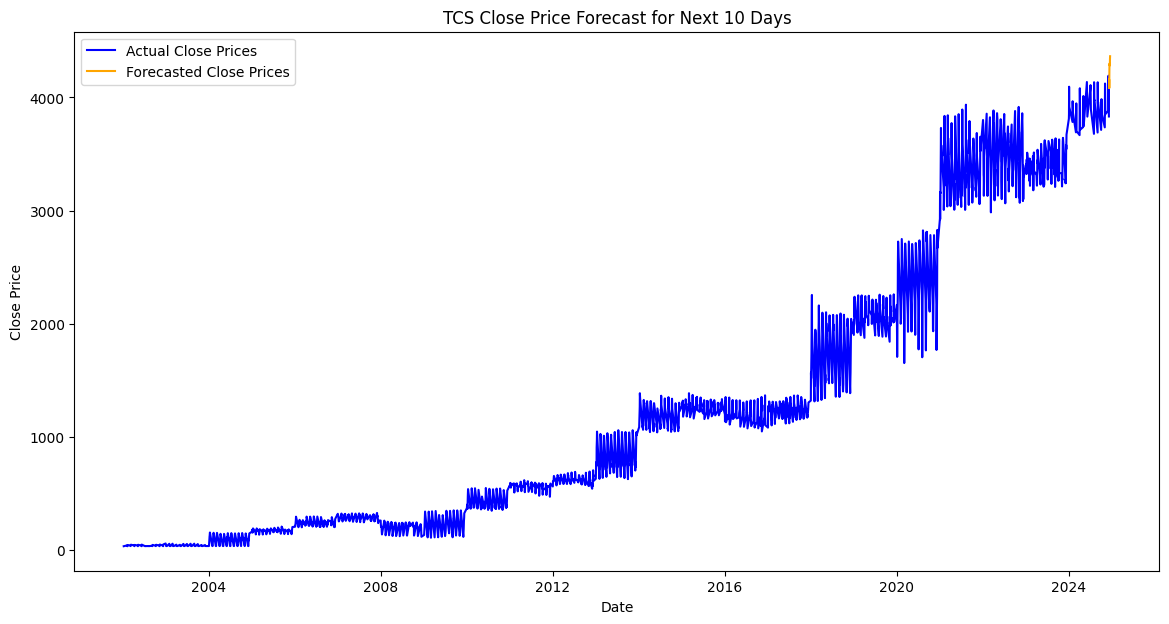

In [42]:
# Inverse transform the forecast
forecast = scaler.inverse_transform(np.array(forecast).reshape(-1, 1))

# Plot the forecast
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], Close_prices, label='Actual Close Prices', color='blue')
future_dates = pd.date_range(start=df['Date'].iloc[-1] + pd.Timedelta(days=1), periods=10)
plt.plot(future_dates, forecast, label='Forecasted Close Prices', color='orange')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('TCS Close Price Forecast for Next 10 Days')
plt.legend()
plt.show()



### s(ii) Predicated_Numerical_Val

In [43]:
# Print the forecasted values
for date, value in zip(future_dates, forecast):
    print(f"{date.date()}: {value[0]:.2f}")

2024-12-07: 4085.72
2024-12-08: 4158.95
2024-12-09: 4082.66
2024-12-10: 4223.54
2024-12-11: 4298.44
2024-12-12: 4283.52
2024-12-13: 4283.11
2024-12-14: 4282.76
2024-12-15: 4335.68
2024-12-16: 4363.73


### s(iii) Matrics: MAE

In [44]:
# import metric imp library for MAE, MSE, RMSE, R Sq

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [45]:
# Calculate evaluation metrics

mae_train = mean_absolute_error(y_train_actual, train_predictions)
mse_train = mean_squared_error(y_train_actual, train_predictions)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train_actual, train_predictions)

mae_test = mean_absolute_error(y_test_actual, test_predictions)
mse_test = mean_squared_error(y_test_actual, test_predictions)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test_actual, test_predictions)

### s(iv) MSE_RMSE_RSq

In [46]:
# Print the evaluation metrics

print("Training Metrics:")
print(f"MAE: {mae_train:.2f}")
print(f"MSE: {mse_train:.2f}")
print(f"RMSE: {rmse_train:.2f}")
print(f"R²: {r2_train:.2f}")

print("\nTesting Metrics:")
print(f"MAE: {mae_test:.2f}")
print(f"MSE: {mse_test:.2f}")
print(f"RMSE: {rmse_test:.2f}")
print(f"R²: {r2_test:.2f}")

Training Metrics:
MAE: 53.52
MSE: 7214.31
RMSE: 84.94
R²: 0.98

Testing Metrics:
MAE: 197.56
MSE: 57435.69
RMSE: 239.66
R²: 0.81


In [54]:
# Assuming 'forecast' contains the forecasted values and you want to forecast for the next 10 days
import pandas as pd

# Create a date range for the next 10 days starting from today
forecast_dates = pd.date_range(start=pd.Timestamp.today(), periods=10)

# Print the forecasted values
print("Forecasted High Prices for the Next 10 Days:")
for date, value in zip(forecast_dates, forecast):
    print(f"{date.date()}: {value[0]:.2f}")

Forecasted High Prices for the Next 10 Days:
2024-06-21: 4085.72
2024-06-22: 4158.95
2024-06-23: 4082.66
2024-06-24: 4223.54
2024-06-25: 4298.44
2024-06-26: 4283.52
2024-06-27: 4283.11
2024-06-28: 4282.76
2024-06-29: 4335.68
2024-06-30: 4363.73
